## Get Insigehts and Inference

 Import Necessary libraries and packages

In [1]:
import pickle
import re
import argparse


import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import ipywidgets as widgets
from ipywidgets import Button
import pandas as pd

Import local code

In [16]:
import settings
import utils
import test
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


### Insights of Data

In [3]:
# Read the dataframe which is tranined
df = pd.read_csv("normalized.csv")

In [4]:
# information of dataframe i.e no of images and bbox, label
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  4760 non-null   object
 1   xmin      4760 non-null   int64 
 2   ymin      4760 non-null   int64 
 3   xmax      4760 non-null   int64 
 4   ymax      4760 non-null   int64 
 5   class     4760 non-null   object
dtypes: int64(4), object(2)
memory usage: 223.2+ KB


In [5]:
# print the top records from dataframe to check how it looks like.
df.head()

,filename,xmin,ymin,xmax,ymax,class
0,IP102004079,23,50,341,430,Cicadellidae
1,IP102002337,31,23,308,405,Cicadellidae
2,IP102000754,28,68,704,800,Cicadellidae
3,IP102004291,43,37,255,188,Cicadellidae
4,IP102003298,7,12,402,313,Cicadellidae


In [6]:
# unique 10 classes whcih are trained out of 101 classes
df['class'].unique()

array(['Cicadellidae', 'Aphids', 'Miridae', 'Blister Beetle',
       'Mole Cricket', 'Grub', 'Locustoidea', 'Unaspis Yanonensis',
       'Wireworm', 'Legume Blister Beetle'], dtype=object)

In [7]:
# show the 10 classes with label and image
prep_list = []
for cls in df['class'].unique():
    try:
        usefull_df = df[df['class']==cls].filename
        idx = usefull_df.first_valid_index()
        filename  = usefull_df[idx]
        if '.jpg' not in filename:
            filename = f"{filename}.jpg"
        prep_list.append((filename, cls))
    except Exception as e:
        print(cls, filename)
        print(e)
print(prep_list)  

[('IP102004079.jpg', 'Cicadellidae'), ('IP024000993.jpg', 'Aphids'), ('IP071004689.jpg', 'Miridae'), ('IP052001500.jpg', 'Blister Beetle'), ('IP015000442.jpg', 'Mole Cricket'), ('IP014000099.jpg', 'Grub'), ('IP049001204.jpg', 'Locustoidea'), ('IP078000377.jpg', 'Unaspis Yanonensis'), ('IP016000686.jpg', 'Wireworm'), ('IP051000567.jpg', 'Legume Blister Beetle')]


In [8]:
# show some example of each class
def sample_image(list_of_images):
    R,C = 1,10
    fig = plt.figure(figsize=(20,5))
    for i, (image_url, label) in enumerate(list_of_images):
        image = cv2.imread(f"{settings.IMAGES_PATH}/{image_url}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image  = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA)
        fig.add_subplot(R, C, i+1)
        plt.title(f"{label}")
        plt.imshow(image)
    plt.grid(False)
    plt.axis(False)
    plt.show()

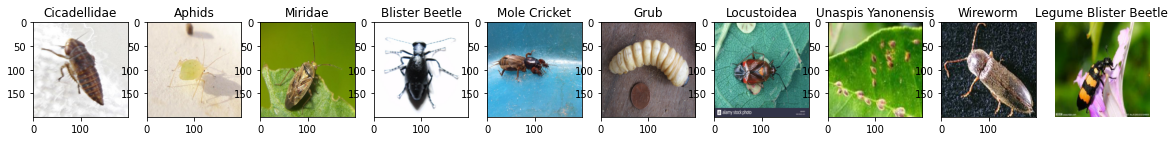

In [9]:
# calling the function to actually display
sample_image(prep_list)

In [17]:
#actal classes with index
utils.pickle_load(settings.LB_PATH).classes_

array(['Aphids', 'Blister Beetle', 'Cicadellidae', 'Grub',
       'Legume Blister Beetle', 'Locustoidea', 'Miridae', 'Mole Cricket',
       'Unaspis Yanonensis', 'Wireworm'], dtype='<U21')

## Predictions

In [32]:
# single draw when someone press predict button
def draw(img, ipy=True):
    img, label, prob = test.draw_bbox_and_title(img)
    if ipy:
        plt.title(f"{label} - {prob}%")
        plt.grid(False)
        plt.axis(False)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
    else:
        status, enc = cv2.imencode('.jpg', img)
        if status:
            return widgets.Image(value=enc.tobytes())
    
    return False

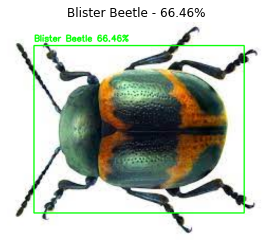

False

In [33]:
# test the code for sample
draw('download.jpg', True)
# matplotlib print = True
# ipywidget print = False

<strong> Builing GUI with in notebook<strong>

In [34]:
# on button click
def fnc(btn):
      for uploaded_filename in uploader.value:
        content = uploader.value[uploaded_filename]['content']   
        with open(uploaded_filename, 'wb') as f:
            f.write(content)
        display(draw(uploaded_filename,True))
        plt.show()
        
# on clear button click
def clear(btn):
    uploader.value.clear()
    uploader._counter = 0

In [35]:
# create uploader and button in widget
uploader = widgets.FileUpload(description="Select")

predict_btn = Button(description='Predict')
clear_btn = Button(description='Clear')
# associate event
predict_btn.on_click(fnc)
clear_btn.on_click(clear)

FileUpload(value={}, description='Select')

Button(description='Predict', style=ButtonStyle())

Button(description='Clear', style=ButtonStyle())

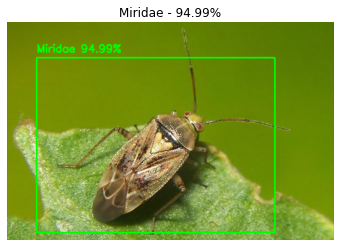

False

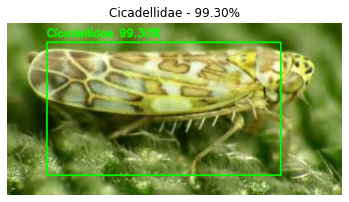

False

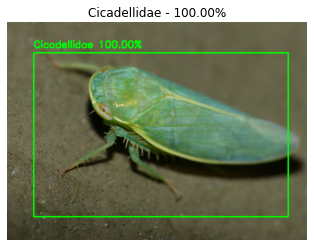

False

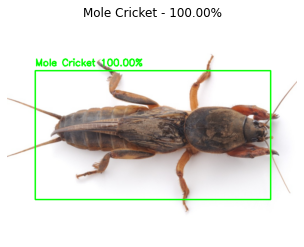

False

In [36]:
# display widget
display(uploader, predict_btn, clear_btn)
